In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from scipy.stats import pearsonr, spearmanr
import statistics
import warnings
import time
from IPython.display import Markdown, display
warnings.filterwarnings('ignore')
sns.set_style("darkgrid", {"grid.color": "0.5", "grid.linestyle": ":"})
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
sns.set_palette('colorblind')

def printmd(string):
    display(Markdown(string))
    
def prct(vl):
    totalFunc = df.shape[0]
    return f'{(vl/totalFunc)*100:.2f}'
    
df = pd.read_csv(r'C:\Users\Filipe\Desktop\FIAP\2 semestre\ia\dados_rh.csv')

# df['genero'].value_counts()


In [2]:
colunas = [str(i) for i in df.columns]
print(f'A base de dados apresenta {df.shape[0]} registros de empregados e {df.shape[1]} variáveis.')
print('Sendo as variáveis de cada coluna, as seguintes:')
for i in colunas:
    printmd(f'**Coluna {colunas.index(i)+1}: {i}**')

A base de dados apresenta 54808 registros de empregados e 14 variáveis.
Sendo as variáveis de cada coluna, as seguintes:


**Coluna 1: id_empregado**

**Coluna 2: departamento**

**Coluna 3: regiao**

**Coluna 4: educacao**

**Coluna 5: genero**

**Coluna 6: canal_de_recrutamento**

**Coluna 7: n_de_treinamentos**

**Coluna 8: idade**

**Coluna 9: pontuacao_ano_anterior**

**Coluna 10: tempo_de_servico**

**Coluna 11: KPIs >80%**

**Coluna 12: venceu_premiacoes?**

**Coluna 13: pontuacao_media_treinamentos**

**Coluna 14: foi_promovido**

<hr style="border:0.5px solid black"> <! -- hr = horizontal rule -->

## Tarefa:
- Carregamento e limpeza de dados
- 5 gráficos
- Estatísticas básicas
- Discussão dos gráficos com conclusõpes sobre a base de dados
- Comentários pertinentes em markdown
- Código em python

---

## Proposta:
- Análise exploratória dos dados
- Elaboração de algoritmos em python
- Representação de dados através de gráficos para melhor entendimento sobre a empresa

<hr style="border:0.5px solid black">

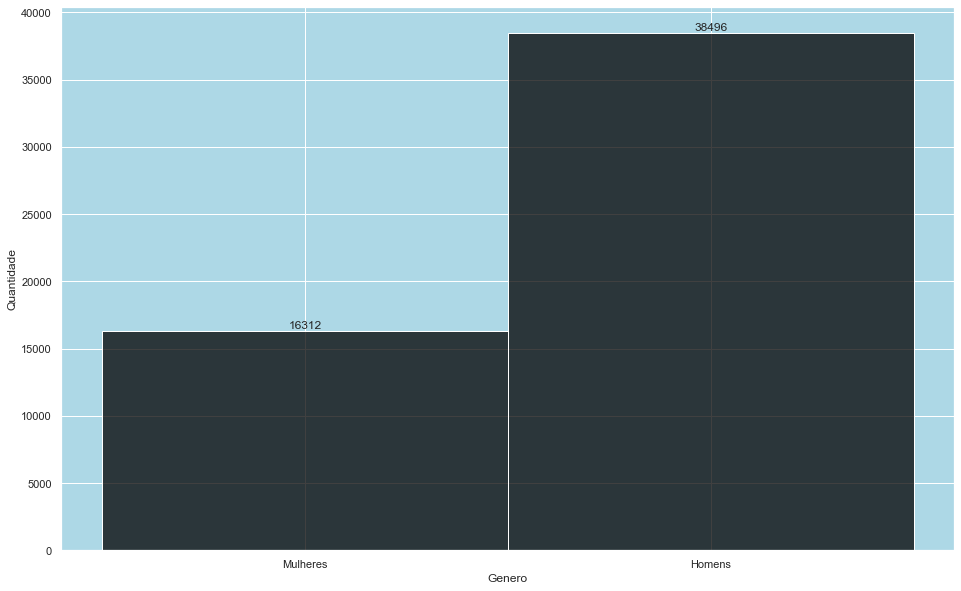

In [3]:
# HISTOGRAMA TOTAL POR GÊNERO

plt.figure(figsize=(16,10))

hist_genero = sns.histplot(data=df['genero'],color='black')
pl.xlabel('Genero')
pl.ylabel('Quantidade')

for i in hist_genero.containers:
    hist_genero.bar_label(i)
    

# RENOMEAR COLUNAS - F M => MULHERES HOMENS
sx, posicao_x = ['Mulheres','Homens'], np.arange(2)
plt.xticks(posicao_x,sx) 
plt.show()

In [4]:
# ALGORITMO EM PYTHON

homens,mulheres,total = 0,0,df['genero'].count()

for i in df['genero']: 
    
    if i == 'M': # MALE 
        homens += 1  
        
    else: 
        mulheres += 1      

print('\033[1m' + 'Homens' + '\033[0m' + f': {homens}\n' + '\033[1m' + 'Mulheres' + '\033[0m' + f': {mulheres}\n' + '\033[1m' + 'Total' + '\033[0m'+ f': {total}')

Homens: 38496
Mulheres: 16312
Total: 54808


In [5]:
# Encontrando a quantidade de profissionais do gênero feminino e masculino no setor de 'Tecnologia'


x = df.loc[:,['genero','departamento']]        


homens_ti,mulheres_ti = 0,0
for i in range(len(x)):
    
    if x.iloc[i,0] == 'M' and x.iloc[i,1] == "Tecnologia":  # Male
        homens_ti += 1
    
    elif x.iloc[i,0] == 'F' and x.iloc[i,1] == "Tecnologia": # Female
        mulheres_ti += 1
       
        
#total de funcionários em TI
total_ti = homens_ti + mulheres_ti


#porcentagem de homens e mulheres
hP,mP = prct(homens), prct(mulheres)


#porcentagem de homens e mulheres em TI
hPTI,mPTI = f'{(homens_ti/total_ti)*100:.2f}', f'{(mulheres_ti/total_ti)*100:.2f}'

In [49]:
# Criando DataFrame com dados obtidos na célula anterior

data_genero_ti = {'Homens' : [homens,hP,homens_ti,hPTI],'Mulheres' : [mulheres,mP,mulheres_ti,mPTI],'Total' : [total,'100%',total_ti,'100%']}


df_genero_ti = pd.DataFrame(data=data_genero_ti, index=['Total por gênero','% sobre o total','Atuando em TI','% sobre TI'])

df_genero_ti = df_genero_ti.style.set_properties(**{
    'font-size':'4.0vh',
    'background-color':"gray",
    'color' : 'black'})


hover = {  
    'selector': 'td:hover',
    'props': [('background-color', 'yellow')]
}


index = {
    'selector': '.index_name',
    'props': 'font-style: italic;'
}


headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: black; color: gray;font-size:3.0vh'
}


df_genero_ti.set_table_styles([hover, index, headers])


df_genero_ti

,Homens,Mulheres,Total
Total por gênero,38496,16312,54808
% sobre o total,70.24,29.76,100%
Atuando em TI,4350,2788,7138
% sobre TI,60.94,39.06,100%


<hr style="border:0.5px solid black">

### O quadro de funcionários da empresa possui uma discrepância entre ambos os gêneros masculino e feminino. 

Com um total de **54.808** funcionários no arquivo, **38.496** são do sexo masculino e **16.312** são do sexo feminino, ou **70.24%** e **29.76%**, respectivamente.
***

### No departamento de Tecnologia, no entanto, essa diferença cai significativamente.

Com um total de **7.138** funcionários no departamento de Tecnologia, **4.350** são do sexo masculino e **2.788** são do sexo feminino, ou **60.94%** e **39.06%**, respectivamente.

<hr style="border:0.5px solid black">


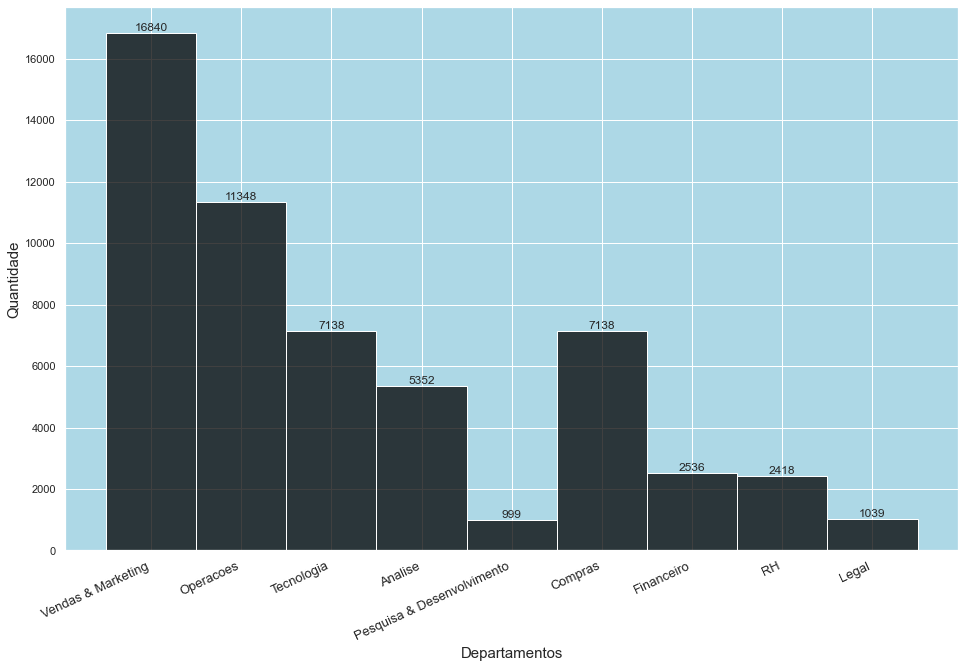

In [7]:
# HISTOGRAMA TOTAL POR DEPARTAMENTO

plt.figure(figsize=(16,10))
hist_depto = sns.histplot(data=df['departamento'],binwidth=1,color='black')

plt.xticks(
    rotation=25, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='13'
)

for i in hist_depto.containers:
    hist_depto.bar_label(i,)
pl.xlabel('Departamentos',fontsize='15')
pl.ylabel('Quantidade',fontsize='15')
    
plt.show()


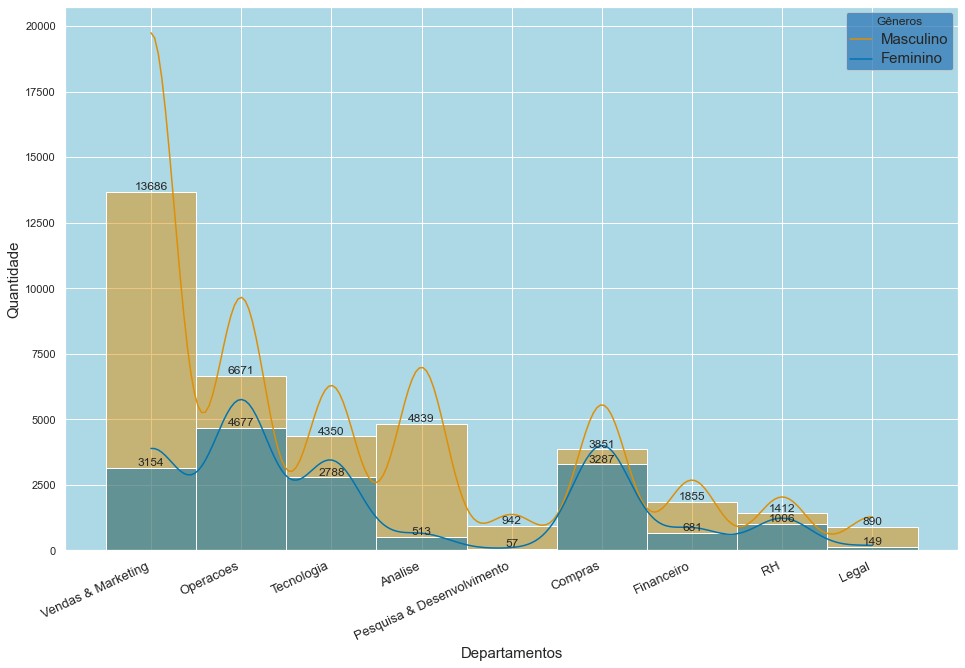

In [8]:
# HISTOGRAMA GÊNERO POR DEPARTAMENTO

plt.figure(figsize=(16,10))

hist_depto_gen = sns.histplot(data=df,x='departamento',hue='genero',kde=True)
plt.xticks(
    rotation=25, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='13'
)

for i in hist_depto_gen.containers:
    hist_depto_gen.bar_label(i)
plt.legend(title='Gêneros', loc='upper right', labels=['Masculino', 'Feminino'],facecolor='#377eb8')
plt.setp(hist_depto_gen.get_legend().get_texts(),fontsize='15')
    
pl.xlabel('Departamentos',fontsize='15')
pl.ylabel('Quantidade',fontsize='15')
    
plt.show()

In [9]:
# ALGORITMO EM PYTHON P/ ENCONTRAR HOMENS E MULHERES POR DEPARTAMENTO


departamentos = set(x['departamento'])   # x = df.loc[:,['genero','departamento']]  - célula 5
departamentos = dict.fromkeys(departamentos,0)

dictDeptos = {i: {'Mulheres': 0,'Homens': 0} for i in departamentos.keys()}

for i in range(len(x)):

    if x.iloc[i,0] == 'M':
        dictDeptos[x.iloc[i,1]]['Homens'] += 1
    
    else:
        dictDeptos[x.iloc[i,1]]['Mulheres'] += 1
        

for i in sorted(dictDeptos.keys()):
    print('\033[1m' + i + '\033[0m')
    print('Homens: ', dictDeptos[i]['Homens'], ' &  Mulheres: ', dictDeptos[i]['Mulheres'])
    print()


Analise
Homens:  4839  &  Mulheres:  513

Compras
Homens:  3851  &  Mulheres:  3287

Financeiro
Homens:  1855  &  Mulheres:  681

Legal
Homens:  890  &  Mulheres:  149

Operacoes
Homens:  6671  &  Mulheres:  4677

Pesquisa & Desenvolvimento
Homens:  942  &  Mulheres:  57

RH
Homens:  1412  &  Mulheres:  1006

Tecnologia
Homens:  4350  &  Mulheres:  2788

Vendas & Marketing
Homens:  13686  &  Mulheres:  3154



In [10]:
# Algoritmo em Python para encontrar porcentagem de funcionários(as) em cada departamento


print('Distribuição por setores (em porcentagem): \n')

# dict departamentos declarado na célula anterior

if departamentos['Tecnologia'] is 0:   # Condicional para evitar que, no caso de rodar apenas esta célula, o for
    for i in x['departamento']:        # não seja executado repetidamente e adicione funcionários(as) "fantasmas" no dict
        departamentos[i] += 1


for i in sorted(departamentos.keys()):
   print('\033[1m' + i + '\033[0m : ',end='') 
   print(prct(departamentos[i]),'%') 


Distribuição por setores (em porcentagem): 

Analise : 9.76 %
Compras : 13.02 %
Financeiro : 4.63 %
Legal : 1.90 %
Operacoes : 20.71 %
Pesquisa & Desenvolvimento : 1.82 %
RH : 4.41 %
Tecnologia : 13.02 %
Vendas & Marketing : 30.73 %


<hr style="border:0.5px solid black">

### A empresa possui a maior parte de seus funcionários(as) alocados(as) em setores estratégicos que, possivelmente, configuram um negócio do setor varejista. O seu quadro de funcionários(as) está dividido da seguinte forma:
1. Vendas & Marketing = **16.840 funcionários**, **30.73% do total**
2. Operações = **11.348**, ou **20.71%**
3. Compras = **7.138**, ou **13.02%** 
4. Tecnologia = **7.138**, ou **13.02%**    <ins>= Compras</ins>
5. Análise = **5.352**, ou **9.75%**  
6. Financeiro = **2.537**, ou **4.63%** 
7. Recursos Humanos = **2.418**, ou **4.41%** 
8. Legal = **1.039**, ou **1.90%**
9. Pesquisa & Desenvolvimento = **999**, ou **1.82%**

<hr style="border:0.5px solid black">


Histograma : Idade x Key Performance Indicator > 80%


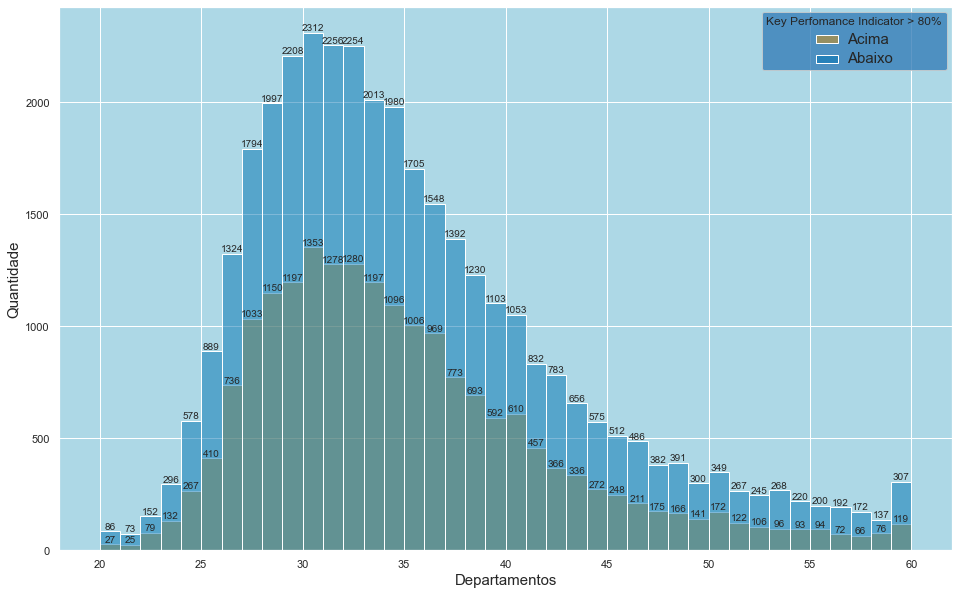

In [11]:
print('Histograma : Idade x Key Performance Indicator > 80%')

plt.figure(figsize=(16,10))

hist_idade_x_kpi = sns.histplot(data=df,x='idade',hue='KPIs >80%',binwidth=1,)


for i in hist_idade_x_kpi.containers:
    hist_idade_x_kpi.bar_label(i,fontsize='10')
plt.legend(title='Key Perfomance Indicator > 80%', loc='upper right', labels=['Acima', 'Abaixo'],facecolor='#377eb8')
plt.setp(hist_idade_x_kpi.get_legend().get_texts(),fontsize='15')

pl.xlabel('Departamentos',fontsize='15')
pl.ylabel('Quantidade',fontsize='15')


plt.show()

<hr style="border:0.5px solid black">

###        O indicador de performance é semelhante ou muito próximo em todas as idades.

---

Embora a grande parte dos funcionários esteja concentrada na faixa etária dos ~27 aos ~40 anos, a proporção de 
funcionários(as) com indicador de performance acima e abaixo dos 80% é muito semelhante.

<hr style="border:0.5px solid black">


Kdeplot de promoções por idades


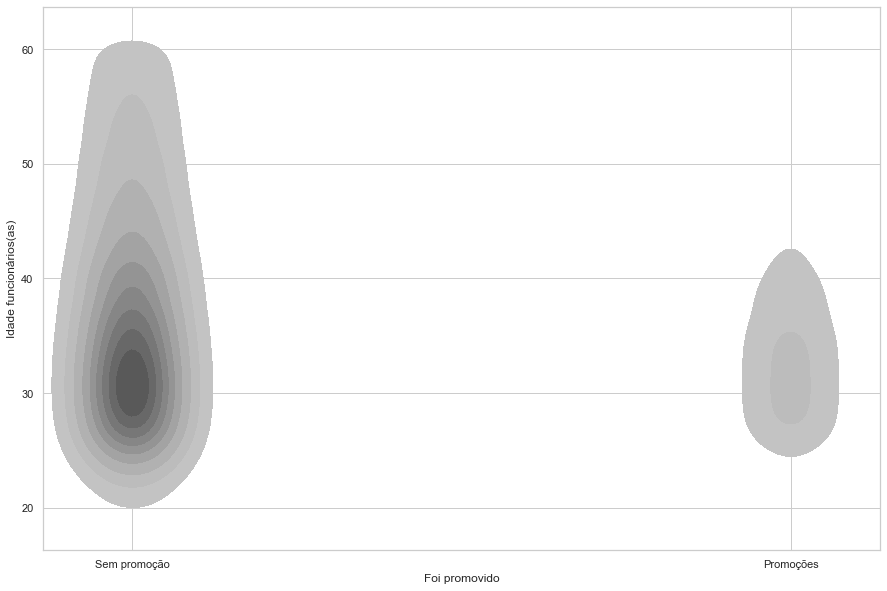

In [12]:
print('Kdeplot de promoções por idades')
sns.set_style("whitegrid")

plt.figure(figsize=(15,10))
fig = sns.kdeplot(data=df,x='foi_promovido',y='idade', shade=True, color="black")
pl.xlabel('Foi promovido')
pl.ylabel('Idade funcionários(as)')

promocao, posicao_x = ['Sem promoção','Promoções'], np.arange(2)
plt.xticks(posicao_x,promocao) 

plt.show()

<hr style="border:0.5px solid black">

### No entanto, as promoções parecem ser bem mais frequentes entre os ~25 e ~43 anos.

---

Apesar da diferença entre os **indicadores de performance serem quase imperceptíveis**, as promoções, no entanto, não seguem o mesmo padrão. 


Enquanto a maioria das idades entre **25 e 45** possuam uma proporção de **10:1** entre funcionários por promoção,  algumas idades (especialmente as mais próximas dos **60 anos**) possuem uma proporções próximas ou superiores a **1:40 (58 anos)**.

<hr style="border:0.5px solid black">


Histograma : Idade x Promoções


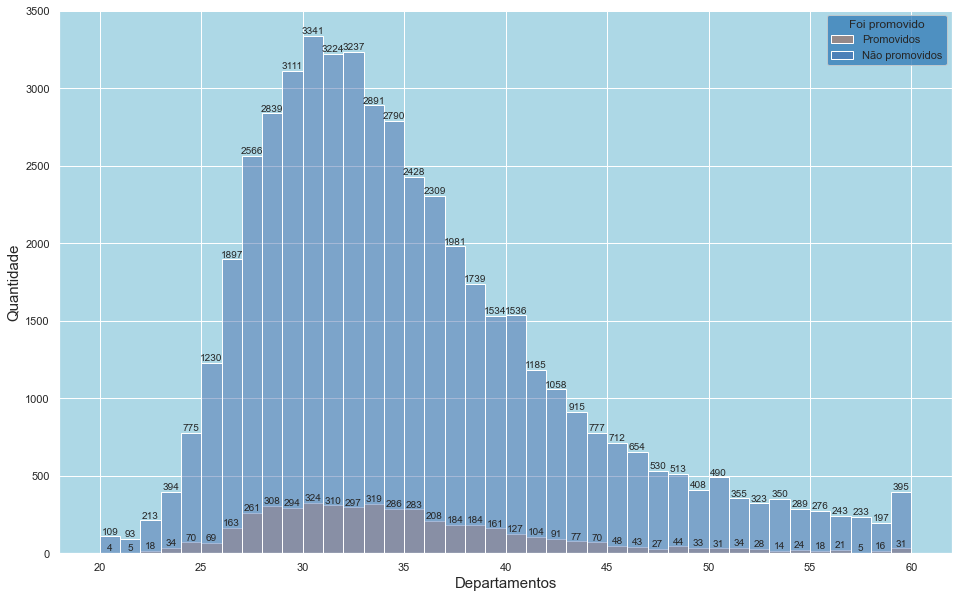

In [13]:
print('Histograma : Idade x Promoções')
sns.set_style("darkgrid", {"grid.color": "0.5", "grid.linestyle": ":"})
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})

plt.figure(figsize=(16,10))
hist_idade_x_promo = sns.histplot(data=df,x='idade',hue='foi_promovido',binwidth=1)

for i in hist_idade_x_promo.containers:
    hist_idade_x_promo.bar_label(i,fontsize='10')


plt.legend(title='Foi promovido', loc='upper right', labels=['Promovidos', 'Não promovidos'],facecolor='#377eb8')
plt.setp(hist_idade_x_kpi.get_legend().get_texts(),fontsize='15')

pl.xlabel('Departamentos',fontsize='15')
pl.ylabel('Quantidade',fontsize='15')

plt.show()

In [14]:
# Algoritmo em Python para encontrar a quantidade de funcionários(as) em determinadas idades


maiorIdade, menorIdade = max(df['idade']), min(df['idade'])
dictIdadesQtd, dictIdadesPromocoes = {i : 0 for i in range(menorIdade,maiorIdade+1)},{i : 0 for i in range(menorIdade,maiorIdade+1)}


for i in range(df.shape[0]):
    dictIdadesQtd[df.iloc[i,7]] += 1
    if df.iloc[i,13] == 1:                          # Se coluna 14 (foi_promovido) == 1 (True)
        dictIdadesPromocoes[df.iloc[i,7]] += 1      # dict no índice i (iterador) e coluna 8 (idade) += 1 ocorrência

print('Quantidade de funcionários e promoções por idade\n')

for i in dictIdadesQtd:
    print('\033[1m' + str(i) + ' Anos ' + '\033[0m :',end=' ')
    print(dictIdadesQtd[i],' funcionários(as)')
    print(dictIdadesPromocoes[i], f'promoções ==> {dictIdadesPromocoes[i]/sum(dictIdadesPromocoes.values())*100:.2f} % do total de promoções\n')
 

Quantidade de funcionários e promoções por idade

20 Anos  : 113  funcionários(as)
4 promoções ==> 0.09 % do total de promoções

21 Anos  : 98  funcionários(as)
5 promoções ==> 0.11 % do total de promoções

22 Anos  : 231  funcionários(as)
18 promoções ==> 0.39 % do total de promoções

23 Anos  : 428  funcionários(as)
34 promoções ==> 0.73 % do total de promoções

24 Anos  : 845  funcionários(as)
70 promoções ==> 1.50 % do total de promoções

25 Anos  : 1299  funcionários(as)
69 promoções ==> 1.48 % do total de promoções

26 Anos  : 2060  funcionários(as)
163 promoções ==> 3.49 % do total de promoções

27 Anos  : 2827  funcionários(as)
261 promoções ==> 5.59 % do total de promoções

28 Anos  : 3147  funcionários(as)
308 promoções ==> 6.60 % do total de promoções

29 Anos  : 3405  funcionários(as)
294 promoções ==> 6.30 % do total de promoções

30 Anos  : 3665  funcionários(as)
324 promoções ==> 6.94 % do total de promoções

31 Anos  : 3534  funcionários(as)
310 promoções ==> 6.64 % do 

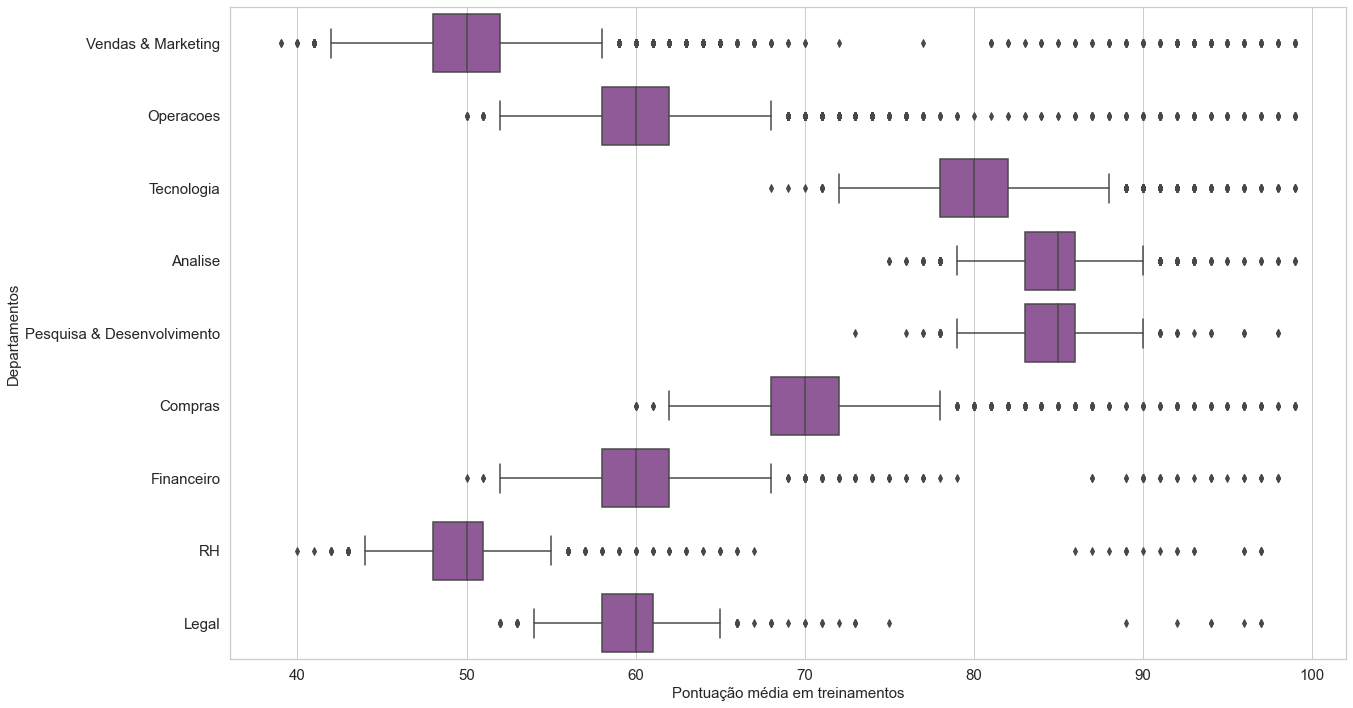

In [15]:
plt.figure(figsize=(20,12))
sns.set_style("whitegrid")
sns.boxplot(data=df,x='pontuacao_media_treinamentos',y='departamento',color='#984ea3')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
pl.xlabel('Pontuação média em treinamentos',fontsize='15')
pl.ylabel('Departamentos',fontsize='15')
plt.show()

In [16]:
dfPontDepto = df.loc[:,['pontuacao_media_treinamentos','departamento']]
novoDepartamentos = {i: [] for i in departamentos.keys()}


for i in range(dfPontDepto.shape[0]):
    
    novoDepartamentos[dfPontDepto.iloc[i,1]].append(dfPontDepto.iloc[i,0])


deptoQuartis = {i:[] for i in departamentos.keys()}
for i in novoDepartamentos.keys():
    print('\033[1m' + 'DEPARTAMENTO: '+ str(i) + '\033[0m')
    quartis = np.quantile(novoDepartamentos[i],[0,0.25,0.5,0.75,1],axis = 0)
    print(f'Nota mais baixa: {quartis[0]:.0f}')
    print(f'Primeiro quartil: entre {quartis[0]:.0f} e {quartis[1]:.0f}')
    print(f'Segundo quartil: entre {quartis[1]+1:.0f} e {quartis[2]:.0f}\nMediana: {quartis[2]:.0f}')
    print(f'Terceiro quartil: entre {quartis[2]+1:.0f} e {quartis[3]:.0f}')
    print(f'Quarto quartil: entre {quartis[3]+1:.0f} e {quartis[4]:.0f}\nNota mais alta: {quartis[4]:.0f}\n')
    deptoQuartis[i] = [f'{i:.0f}' for i in quartis]


DEPARTAMENTO: Legal
Nota mais baixa: 52
Primeiro quartil: entre 52 e 58
Segundo quartil: entre 59 e 60
Mediana: 60
Terceiro quartil: entre 61 e 61
Quarto quartil: entre 62 e 97
Nota mais alta: 97

DEPARTAMENTO: RH
Nota mais baixa: 40
Primeiro quartil: entre 40 e 48
Segundo quartil: entre 49 e 50
Mediana: 50
Terceiro quartil: entre 51 e 51
Quarto quartil: entre 52 e 97
Nota mais alta: 97

DEPARTAMENTO: Pesquisa & Desenvolvimento
Nota mais baixa: 73
Primeiro quartil: entre 73 e 83
Segundo quartil: entre 84 e 85
Mediana: 85
Terceiro quartil: entre 86 e 86
Quarto quartil: entre 87 e 98
Nota mais alta: 98

DEPARTAMENTO: Financeiro
Nota mais baixa: 50
Primeiro quartil: entre 50 e 58
Segundo quartil: entre 59 e 60
Mediana: 60
Terceiro quartil: entre 61 e 62
Quarto quartil: entre 63 e 98
Nota mais alta: 98

DEPARTAMENTO: Compras
Nota mais baixa: 60
Primeiro quartil: entre 60 e 68
Segundo quartil: entre 69 e 70
Mediana: 70
Terceiro quartil: entre 71 e 72
Quarto quartil: entre 73 e 99
Nota mais 

In [44]:
dfQuartis = pd.DataFrame(data=deptoQuartis, index=['Nota mais baixa','Primeiro quartil','Segundo quartil/mediana','Terceiro quartil','Quarto quartil/nota mais alta'])
dfQuartis = dfQuartis.style.set_properties(**{
    'font-size':'1.5vh',
    'font-weight':'bold',
    'background-color':"gray",
    'color' : 'black',
    'text-align' : 'center'})


hover = {  
    'selector': 'td:hover',
    'props': [('background-color', 'yellow'),('font-size','3.0vh')]
}


index = {
    'selector': '.index_name',
    'props': 'font-style: italic; text-align:center;'
}


headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: black; color: gray;font-size:1.5vh;text-align:center'
}


dfQuartis.set_table_styles([hover, index, headers])
dfQuartis


,Legal,RH,Pesquisa & Desenvolvimento,Financeiro,Compras,Analise,Vendas & Marketing,Tecnologia,Operacoes
Nota mais baixa,52,40,73,50,60,75,39,68,50
Primeiro quartil,58,48,83,58,68,83,48,78,58
Segundo quartil/mediana,60,50,85,60,70,85,50,80,60
Terceiro quartil,61,51,86,62,72,86,52,82,62
Quarto quartil/nota mais alta,97,97,98,98,99,99,99,99,99
